In [1]:
# Program to develop a regression model on an existing dataset
# Exporting different libraries
import pandas
import numpy 
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
raw_df = pandas.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = numpy.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
#Displaying the structure of dataset
print("Dimensions of data variables:{}".format(data.shape))
print("Dimensions of target variable:{}".format(target.shape))

Dimensions of data variables:(506, 13)
Dimensions of target variable:(506,)


In [4]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
#Creating a dataframe of Boston dataset.
bostondf=pandas.DataFrame(data,columns=feature_names)
bostondf['MEDV'] = target

In [6]:
#Generating the same dataset using seed() function
numpy.random.seed(2000)

In [7]:
#Creating the training and test dataset
training,test=train_test_split(bostondf,test_size=0.3)
x_trg=training.drop('MEDV',axis=1)
y_trg=training['MEDV']
x_test=test.drop('MEDV',axis=1)
y_test=test['MEDV']

In [8]:
# Creating a linear regression model
model1=linear_model.LinearRegression()

In [9]:
# Train the model using the training set
model1.fit(x_trg,y_trg)

LinearRegression()

In [10]:
# Determining accuracy of the training set
print("Accuracy of training dataset is: ",model1.score(x_trg,y_trg))

Accuracy of training dataset is:  0.7497329669344379


In [11]:
# Displaying equation coefficient and intercept
print('Value of Coefficients is: \n',model1.coef_)
print('Value of intercept is:',model1.intercept_)

Value of Coefficients is: 
 [-1.03910566e-01  3.03790199e-02 -6.07304248e-02  1.22375885e+00
 -1.56868905e+01  3.82289411e+00 -3.70049661e-03 -1.35985060e+00
  2.70620421e-01 -1.04886675e-02 -1.04492769e+00  9.54682149e-03
 -4.70256905e-01]
Value of intercept is: 36.67861963321758


In [12]:
#Predict the output from test set
predicted=model1.predict(x_test)

In [13]:
#Determinging root mean squared error.
rmselm=sqrt(mean_squared_error(y_test,predicted))
print("The value of RMSE error is:",rmselm)

The value of RMSE error is: 5.240437660983596


The value of RMSE is 5.24, which shows that it is not a good prediction and steps must be taken to lower the RMSE
This include
- increasing the sample size
- checking if we can reduce the number of independent variables
- changing the model
- data exploration
-processing

In [14]:
# Program to develp model after data exploration and processing
# Importing libraries 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

# Step 1-A understanding the dataset
#Creating a dataframe of Boston dataset.
boston_datadf=bostondf.copy()
boston_targetdf= target.copy()

In [15]:
# Determining the nature of variables.
print("Details of variables n the dataset:\n",boston_datadf.describe())

Details of variables n the dataset:
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.

In [16]:
# Determine nature of single variable
print("The details of CRIM are:\n",boston_datadf['CRIM'].describe())

The details of CRIM are:
 count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64


In [17]:
#Determining number of observations for each value of "CHAS"
print("The details of CHAS are:\n",boston_datadf['CHAS'].value_counts())

The details of CHAS are:
 0.0    471
1.0     35
Name: CHAS, dtype: int64


----------------------------COUNT PLOT-------------------------------


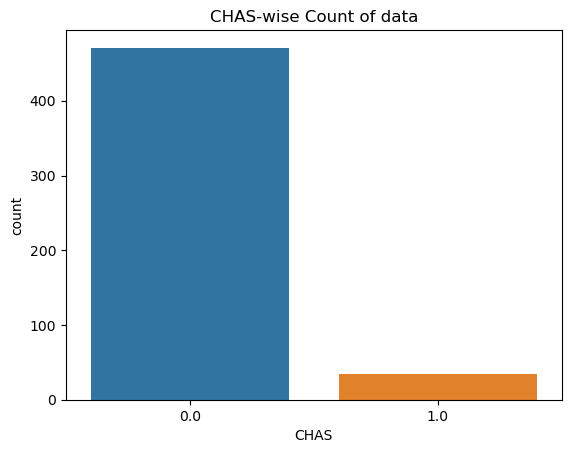

In [18]:
#Determining count in Visual form using count plot
print("----------------------------COUNT PLOT-------------------------------")
sns.countplot(x='CHAS',data=boston_datadf).set_title('CHAS-wise Count of data')
plt.show()

--------------BOX PLOT---------------------------


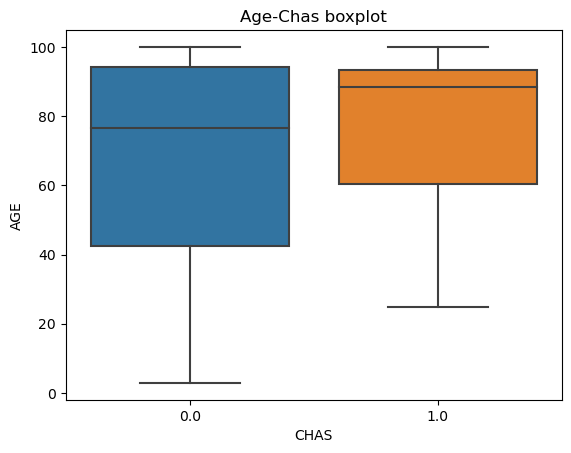

In [19]:
# Creating a box Plot
print("--------------BOX PLOT---------------------------")
sns.boxplot(x='CHAS',y='AGE',data=boston_datadf).set_title("Age-Chas boxplot")
plt.show()

---------------------------DISTRIBUTION PLOT-----------------------------


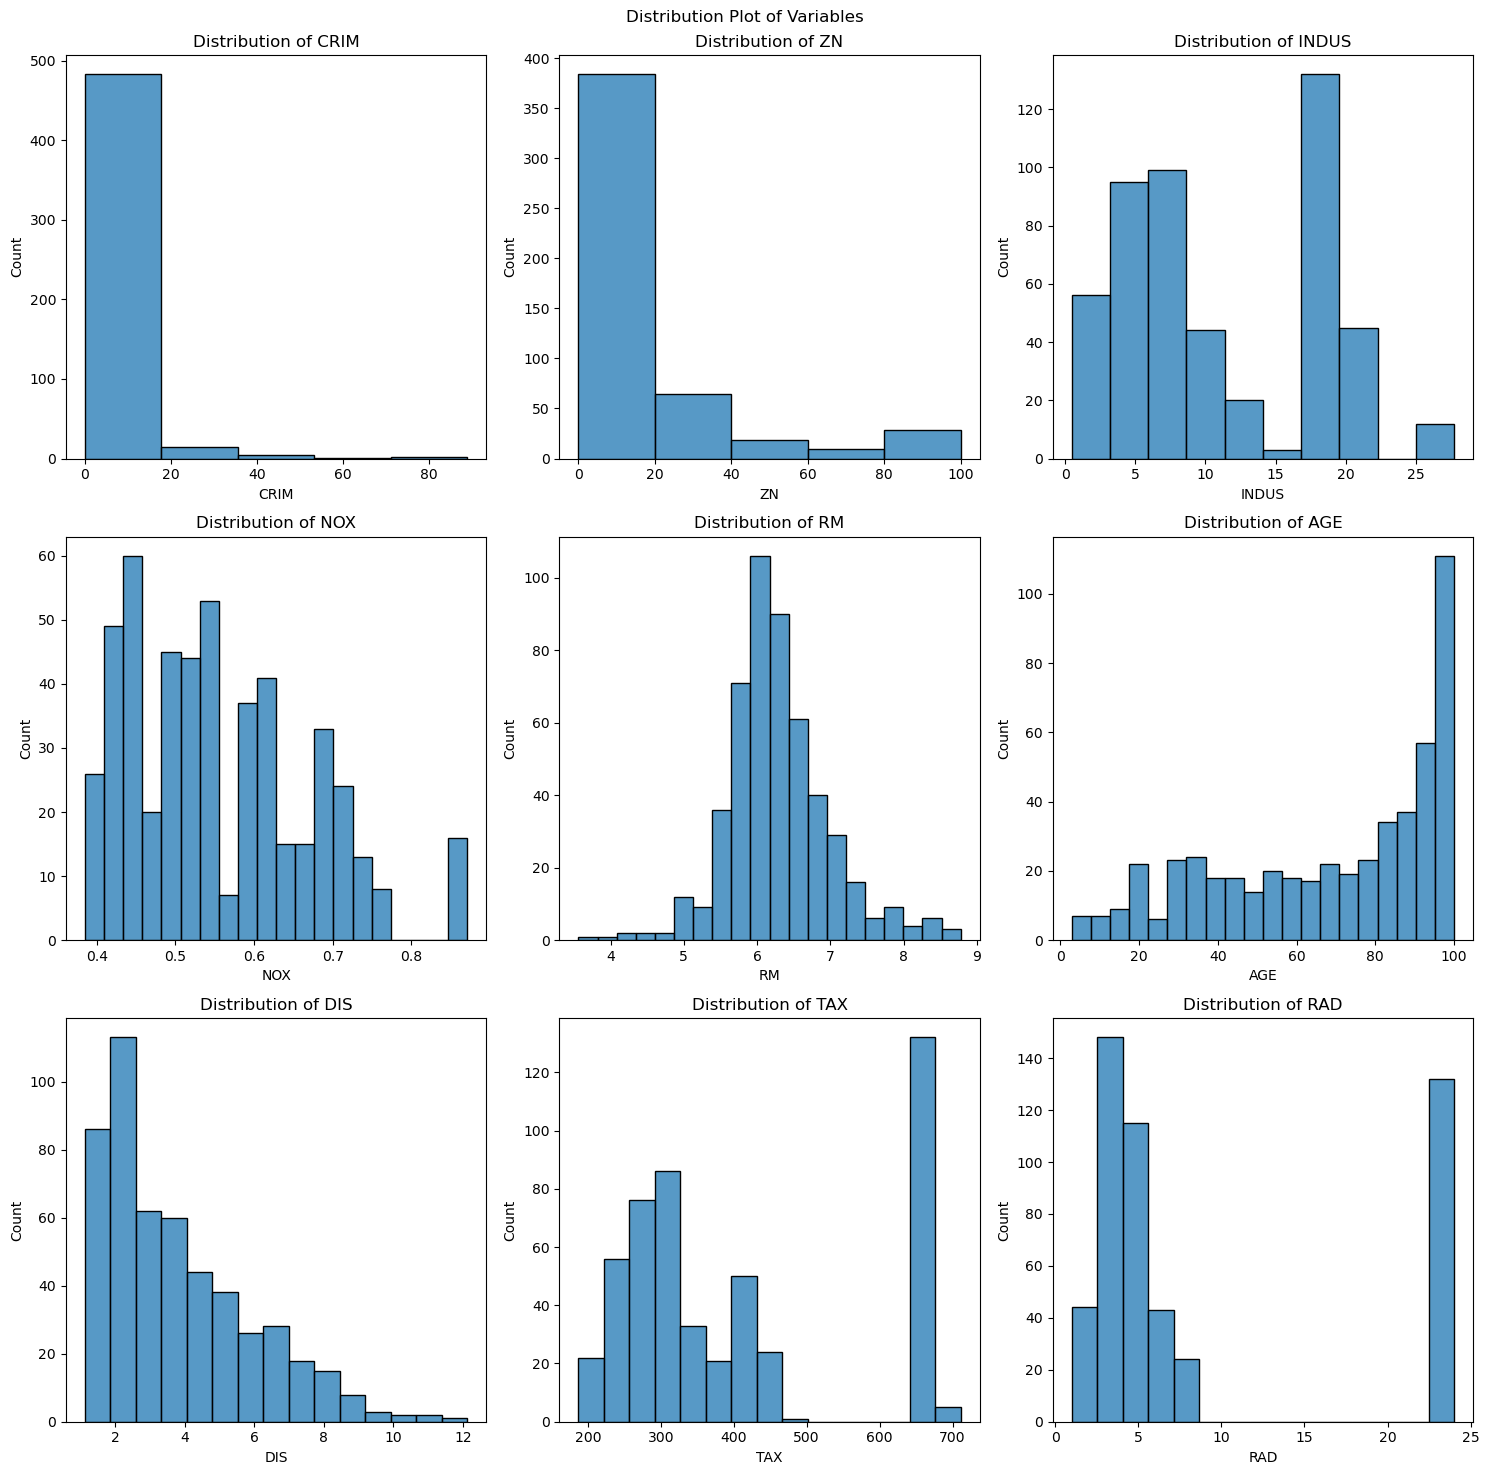

In [20]:
# Corrected code for creating distribution plots within subplots
print("---------------------------DISTRIBUTION PLOT-----------------------------")
plt.figure(1,figsize=(15,15))

plt.subplot(331)
sns.histplot(boston_datadf["CRIM"],bins=5)
plt.title("Distribution of CRIM")

plt.subplot(332)
sns.histplot(boston_datadf["ZN"],bins=5)
plt.title("Distribution of ZN")

plt.subplot(333)
sns.histplot(boston_datadf["INDUS"],bins=10)
plt.title("Distribution of INDUS")

plt.subplot(334)
sns.histplot(boston_datadf["NOX"],bins=20)
plt.title("Distribution of NOX")

plt.subplot(335)
sns.histplot(boston_datadf["RM"],bins=20)
plt.title("Distribution of RM")

plt.subplot(336)
sns.histplot(boston_datadf["AGE"],bins=20)
plt.title("Distribution of AGE")

plt.subplot(337)
sns.histplot(boston_datadf["DIS"],bins=15)
plt.title("Distribution of DIS")

plt.subplot(338)
sns.histplot(boston_datadf["TAX"],bins=15)
plt.title("Distribution of TAX")

plt.subplot(339)
sns.histplot(boston_datadf["RAD"],bins=15)
plt.title("Distribution of RAD")

plt.suptitle("Distribution Plot of Variables")
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

------------------HISTOGRAM---------------------------


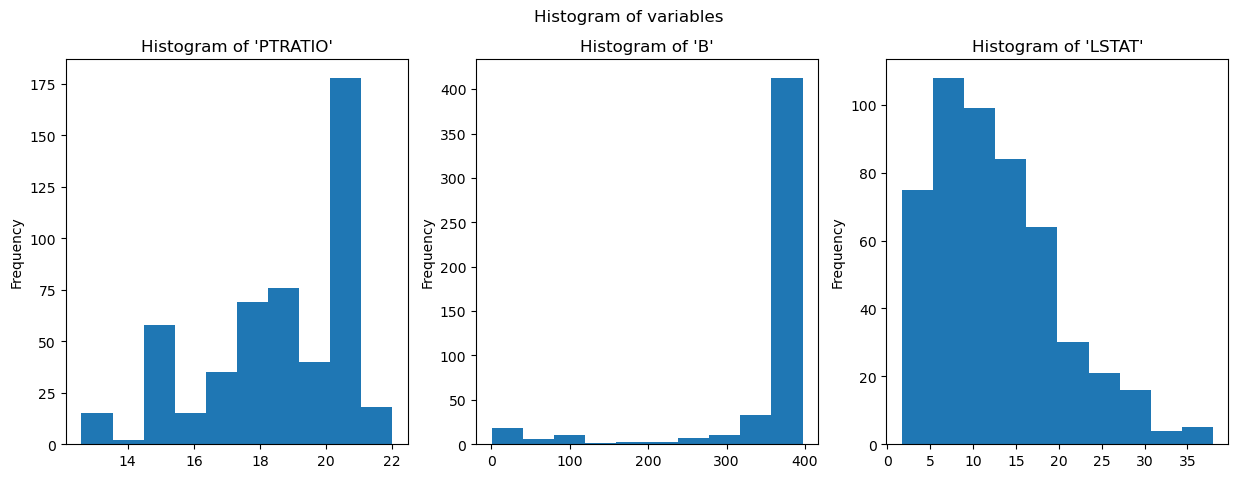

In [21]:
# Creating Histogram of variables: "PTRATIO,B and LSTT"
print("------------------HISTOGRAM---------------------------")
plt.figure(2,figsize=(15,5))
plt.subplot(131)
boston_datadf["PTRATIO"].plot.hist(bins=10).set_title("Histogram of 'PTRATIO'")
plt.subplot(132)
boston_datadf["B"].plot.hist(bins=10).set_title("Histogram of 'B'")
plt.subplot(133)
boston_datadf["LSTAT"].plot.hist(bins=10).set_title("Histogram of 'LSTAT'")
plt.suptitle("Histogram of variables")
plt.show()

---------------------------HEAT MAP---------------------------------


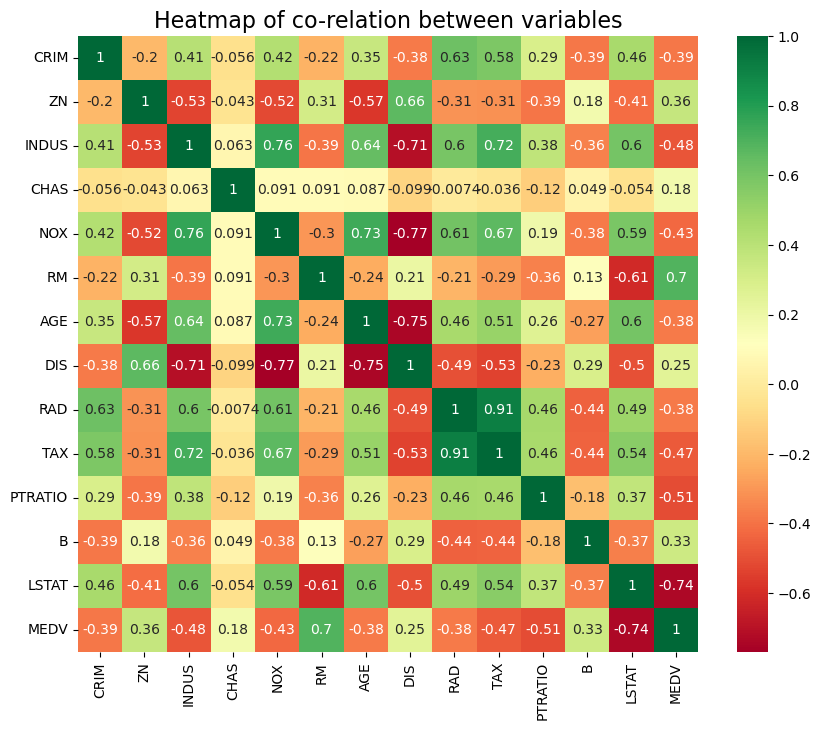

In [22]:
# Creating a heatmap of correlations
print("---------------------------HEAT MAP---------------------------------")
sns.heatmap(boston_datadf.corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

---------------------SCATTER PLOT----------------------------------


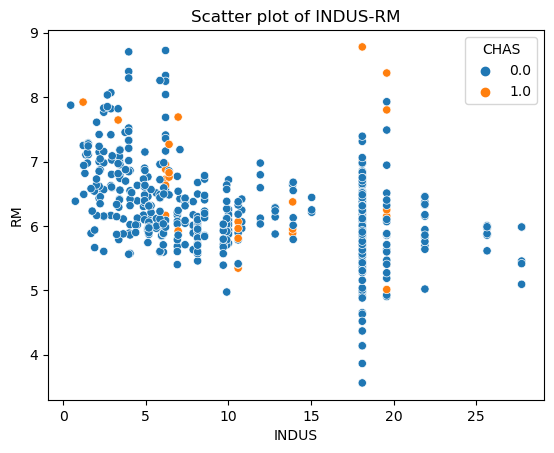

In [23]:
# Creating a scatter plot
print("---------------------SCATTER PLOT----------------------------------")
sns.scatterplot(x='INDUS',y='RM',hue='CHAS',data=boston_datadf).set_title("Scatter plot of INDUS-RM")
plt.xlabel('INDUS')
plt.ylabel('RM')
plt.show()

--------------------------------SCATTER PAIR PLOT-----------------------------


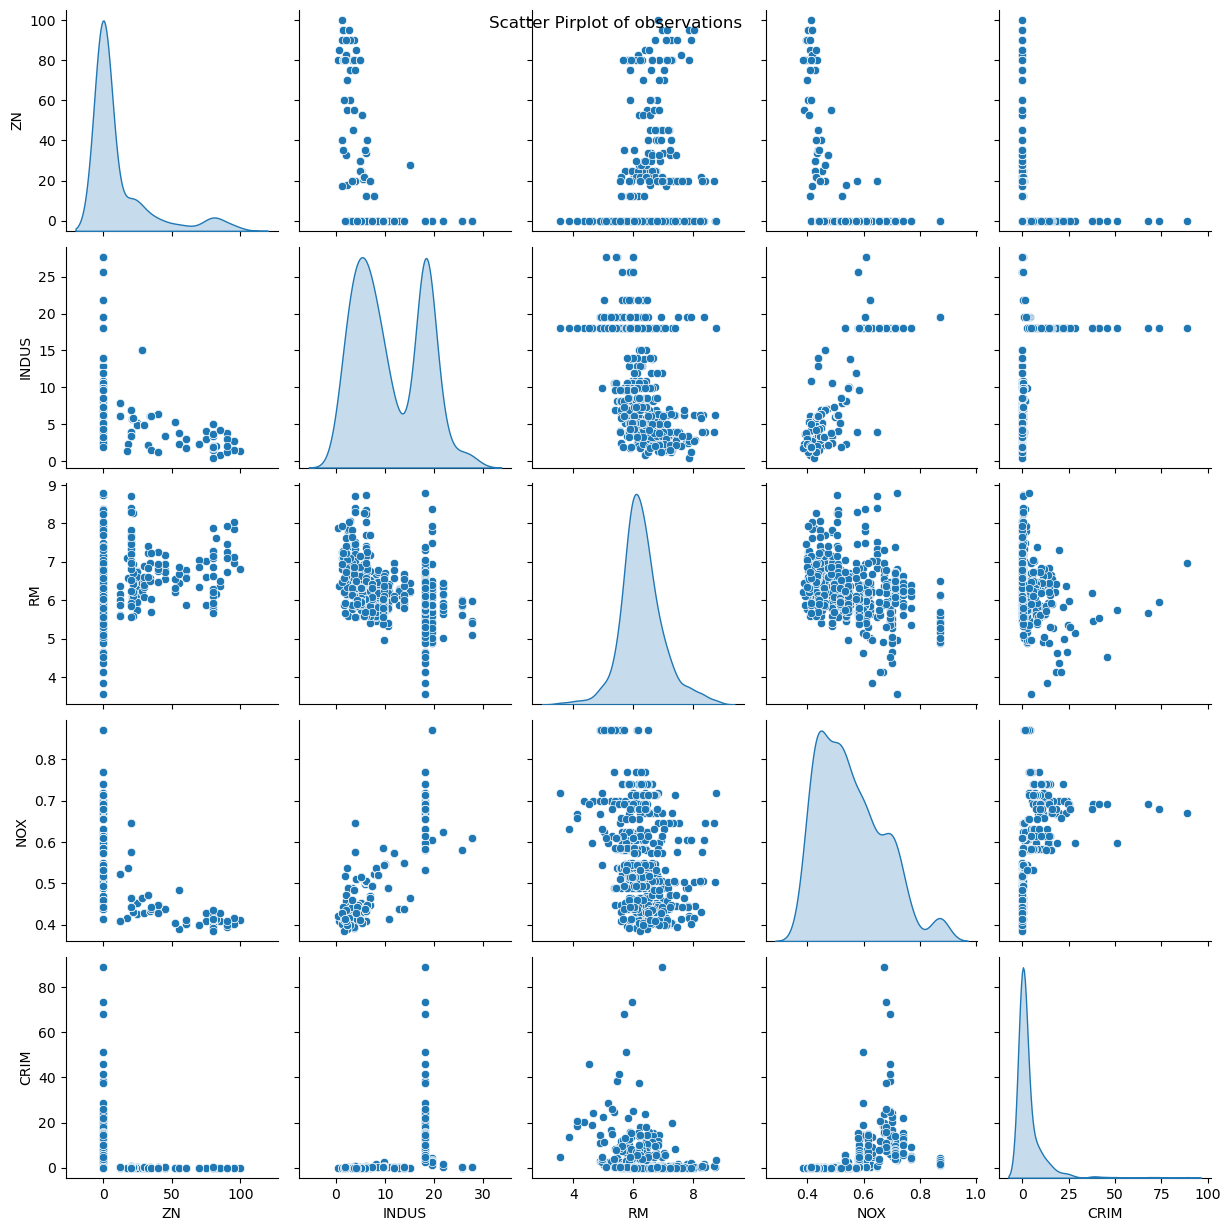

In [24]:
# Scatter pair plot considering kde as diagnonal plot.
print("--------------------------------SCATTER PAIR PLOT-----------------------------")
sns.pairplot(boston_datadf[['ZN','INDUS','RM','NOX','CRIM']],kind='scatter',diag_kind="kde")
plt.suptitle("Scatter Pirplot of observations")
plt.show()

----------------------REGRESSION PAIR PLOT-----------------------


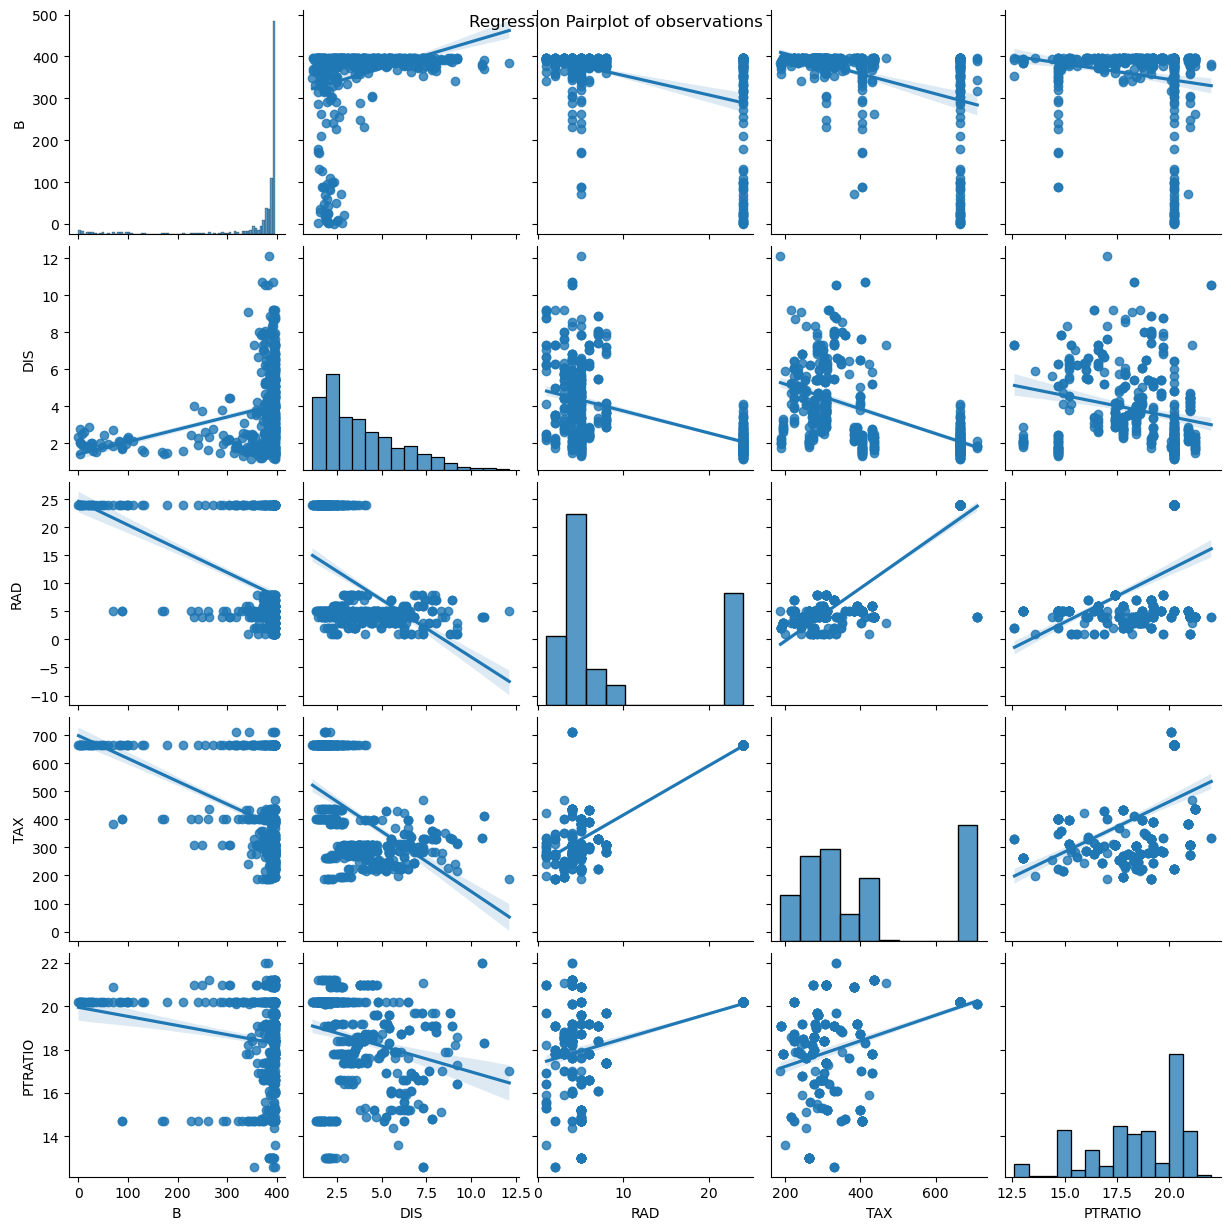

In [25]:
# Regression pair plot considering histogram as diagonal plot
print("----------------------REGRESSION PAIR PLOT-----------------------")
sns.pairplot(boston_datadf[['B','DIS','RAD','TAX','PTRATIO']],diag_kind="hist",kind='reg')
plt.suptitle("Regression Pairplot of observations")
plt.show()

In [26]:
# Step 1-B Determining Missing Values
print("Missing Values in the dataset:\n",boston_datadf.isnull().sum())

Missing Values in the dataset:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [27]:
# Assumption Check
# 1-C Normality Assumption: Determining normality of data
from scipy import stats
print("Skewness of data:\n",stats.skew(data))
print("Kurtosis of data:\n",stats.kurtosis(data))
print("Applying normality test:\n",stats.mstats.normaltest(data))
print("Applying shapiro test:",stats.shapiro(data))

Skewness of data:
 [ 5.20765239  2.21906306  0.29414628  3.39579929  0.72714416  0.40241467
 -0.59718559  1.00877876  1.00183349  0.66796827 -0.79994453 -2.88179835
  0.90377074]
Kurtosis of data:
 [36.75278626  3.97994877 -1.23321847  9.53145284 -0.07586422  1.86102697
 -0.97001393  0.47129857 -0.8705205  -1.14298488 -0.29411638  7.14376929
  0.47654476]
Applying normality test:
 NormaltestResult(statistic=masked_array(data=[562.7482944823795, 228.2702500718707,
                   420.09570785887405, 367.2204294388477,
                   37.50968861157595, 37.89574305099421,
                   114.16541878648658, 66.94502432373655,
                   116.94443040972153, 253.21648766490983,
                   45.94496246904017, 312.25596375104647,
                   57.20741558175866],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False],
       fill_value=1e+20), pvalue=array([6.32063196e-123, 2.70237121e-050,

C:\Users\asus\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


 The skewness and kurtosis of many variables is found to be not falling in the range of -1 and +1. The nromal test and Shapiro test shows that the p-value is significatnt since it is less than 0.5, so data cannot be considered as normmal data

In [34]:
# Step 1-C Multi Collinearlrity assumpitons: Use of VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a function to remove multicollinear columns.
def vifresult(data):
    threshold = 4.0
    variables = list(range(data.shape[1]))
    deleted = True
    while deleted:
        deleted = False
        vifvalue = [variance_inflation_factor(data.iloc[:, variables].values, ix) for ix in range(data.iloc[:, variables].shape[1])]
        maxvifloc = vifvalue.index(max(vifvalue))
        if max(vifvalue) > threshold:
            print('Deleting \'' + data.iloc[:, variables].columns[maxvifloc] + '\' at index:' + str(maxvifloc))
            del variables[maxvifloc]
            deleted = True
    print("Important predictor variables are:", data.columns[variables])
    return data.iloc[:, variables]

# Ensure that 'boston' and 'boston_datadfnew' are defined and initialized before the following lines.

# Calling the above function and determine the new dimension
data = vifresult(boston_datadf)
print("Dimension after multi collinearity assumption:", data.shape)

Deleting 'RM' at index:5
Deleting 'PTRATIO' at index:9
Deleting 'NOX' at index:4
Deleting 'TAX' at index:7
Deleting 'B' at index:7
Deleting 'AGE' at index:4
Deleting 'INDUS' at index:2
Deleting 'DIS' at index:3
Deleting 'RAD' at index:3
Important predictor variables are: Index(['CRIM', 'ZN', 'CHAS', 'LSTAT', 'MEDV'], dtype='object')
Dimension after multi collinearity assumption: (506, 5)


The dimension of this dataset is 506,5, it means that there are five independent variables only and nine variables are deleted that does not fulfill this assumption

In [36]:
# Step 1-C: Linearity Assumption: Use of correlation coefficient
print('Spearman correlation coefficient between crim and target :\n',stats.spearmanr(data.iloc[1:508,0],target[1:508]))
print('Spearman correlation coefficient between zn and target :\n',stats.spearmanr(data.iloc[1:508,1],target[1:508]))
print('Spearman correlation coefficient between chas and target :\n',stats.spearmanr(data.iloc[1:508,2],target[1:508]))
print('Spearman correlation coefficient between lstat and target :\n',stats.spearmanr(data.iloc[1:508,3],target[1:508]))
print('Spearman correlation coefficient between medv and target :\n',stats.spearmanr(data.iloc[1:508,4],target[1:508]))


Spearman correlation coefficient between crim and target :
 SignificanceResult(statistic=-0.558825928519744, pvalue=8.124593792700633e-43)
Spearman correlation coefficient between zn and target :
 SignificanceResult(statistic=0.4371615554873647, pvalue=5.506829035007241e-25)
Spearman correlation coefficient between chas and target :
 SignificanceResult(statistic=0.1410671695201939, pvalue=0.001482225185641379)
Spearman correlation coefficient between lstat and target :
 SignificanceResult(statistic=-0.8529963783472244, pvalue=3.742198206989536e-144)
Spearman correlation coefficient between medv and target :
 SignificanceResult(statistic=0.9999999999999998, pvalue=0.0)


###  The correlation is significant in all cases

In [37]:
# /step 1-D Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data=sc.fit_transform(data)
print("Standard scaling is done on dataset")

Standard scaling is done on dataset


Dimension of training, test dataset: (379, 5) (127, 5)
Coefficient of Independent variables:
 [-1.65048688e-14  2.30926389e-14  2.57571742e-14  1.11022302e-14
  9.18801155e+00]
Intercept in the model: 22.53280632411068
Durbin Watson test: 1.903810267024056


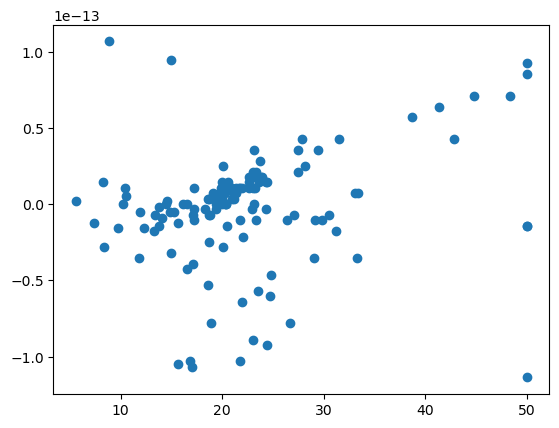

RMSE value for linear model is: 3.8269740896953164e-14


In [40]:
# Step 2: Developing the model
# Using a random seed function for generating the same data set.
numpy.random.seed(3000)

#Creating training,test dataset for dependent and indendent variables.
x_trg,x_test,y_trg,y_test = train_test_split(data,target,random_state=0)
print("Dimension of training, test dataset:",x_trg.shape,x_test.shape)

# Creating a linear regression model on training dataset
model2=linear_model.LinearRegression()

#Fit the linear regression model using training dataset.
model2.fit(x_trg,y_trg)

#Equation coefficient and intercept of the new model
print('Coefficient of Independent variables:\n',model2.coef_)
print('Intercept in the model:',model2.intercept_)

#Step3:Predicting the model.
#Make prediction on test set.
pred=model2.predict(x_test)

#Independence of error assumption: Using Durbin Watson test.
resid=y_test-pred
from statsmodels.stats.stattools import durbin_watson
print("Durbin Watson test:",durbin_watson(resid))

#Homescedasticity assumption: plot between residuals,predicted values.
plt.scatter(pred,resid)
plt.show()

#Step 4:Determining accuracy of the model.
#Calculate RMSE for the model.
rmse=sqrt(mean_squared_error(y_test,pred))
print('RMSE value for linear model is:',rmse)

In [ ]:
You can see that the RMSE value is reduced, even when we have reduced the variables. Also durbin watson test is also valid. 